## Mobile Price Classification using Python
Here our task is to classify the Price range of mobile phones and not ro predict actual prices so we will first map thi problem into ml problem of classification will classify it as follows:
0-low cost 
1-medium cost 
2-high cost 
3- very high cost



In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
sns.set()
# from google.colab import files
# upload = files.upload()


In [52]:
data = pd.read_csv("D:\DATASETS\mobile_prices.csv")
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

Correlation between features 


<AxesSubplot:>

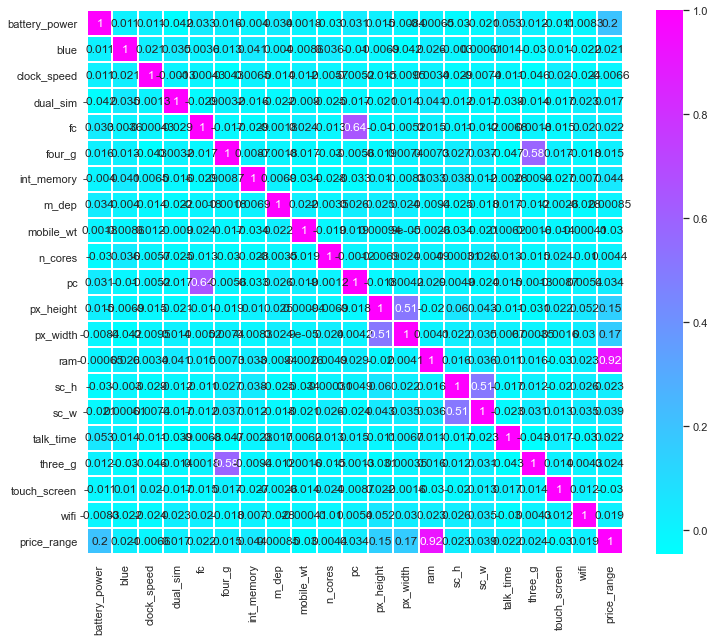

In [82]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="cool", linecolor='white', linewidths=1)

Data Preperation

In [60]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x.shape)
print(y.shape)
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print(x_test.shape)
print(y_test.shape)

(2000, 20)
(2000,)
(600, 20)
(600,)


Applying Model - Logistic regression


In [55]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
y_pred1

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [56]:
accuracy1 = accuracy_score(y_test, y_pred1) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5


In [57]:
model2 = RandomForestClassifier(n_estimators=500, max_depth=11)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 3, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [58]:
accuracy2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy of the Random forest Model: ",accuracy)

Accuracy of the Random forest Model:  95.5


In [77]:
from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier()
  
knn.fit(x_train, y_train)
pred3 = knn.predict(x_test)
acc=accuracy_score(pred3,y_test)
print(acc)

0.5216666666666666


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:04<00:00,  6.03it/s]


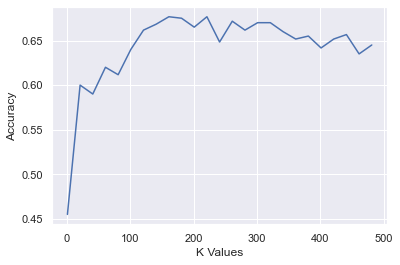

In [75]:
from tqdm import tqdm
score_list = []
for each in tqdm(range(1,500,20)):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.plot(range(1,500,20), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()